In [57]:
import seaborn as sns
import pandas as pd
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_json('loan_approval_dataset.json')

In [5]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [7]:
df.shape

(252000, 13)

In [8]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [9]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


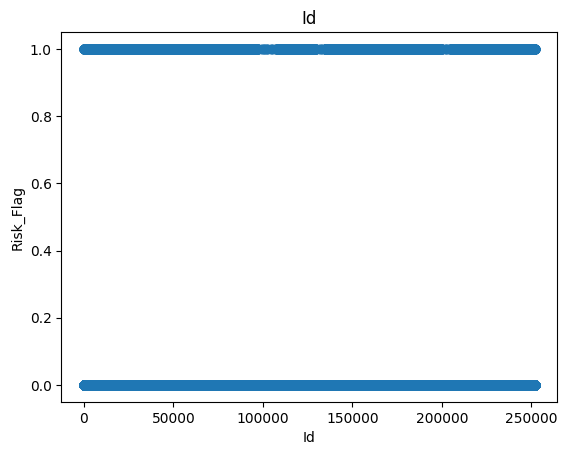

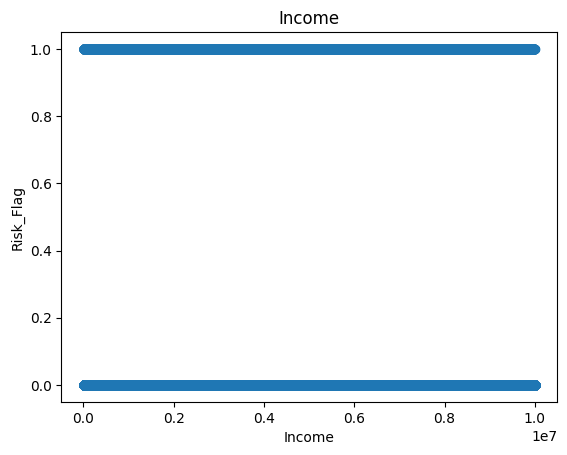

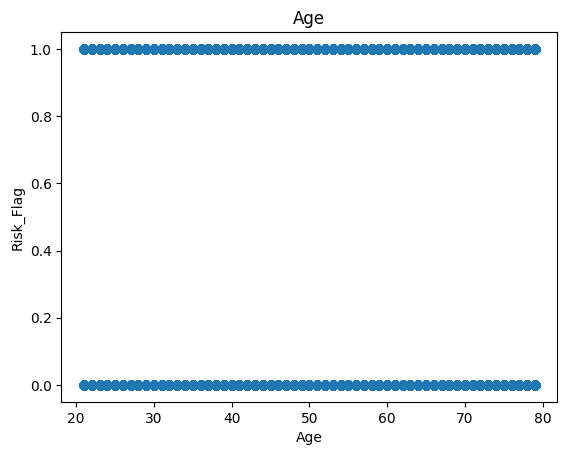

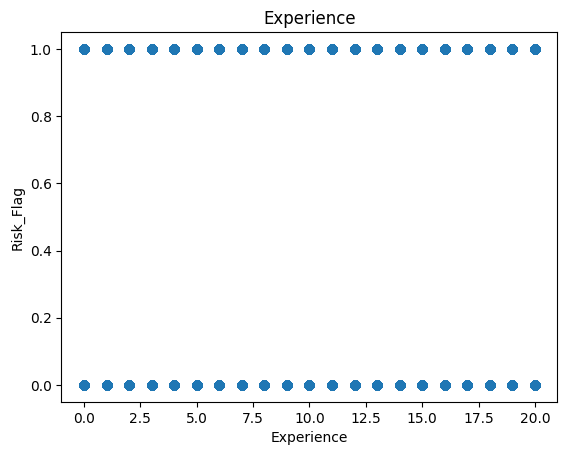

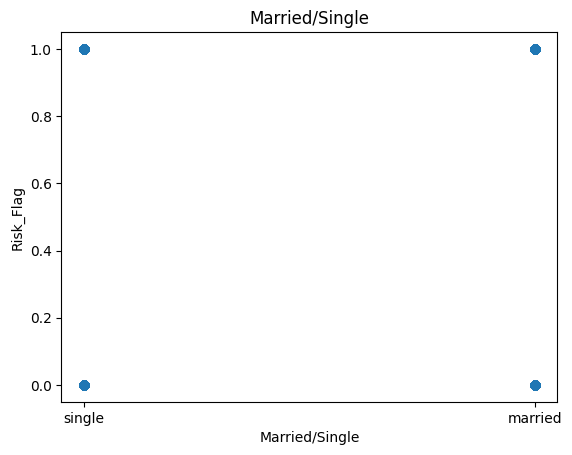

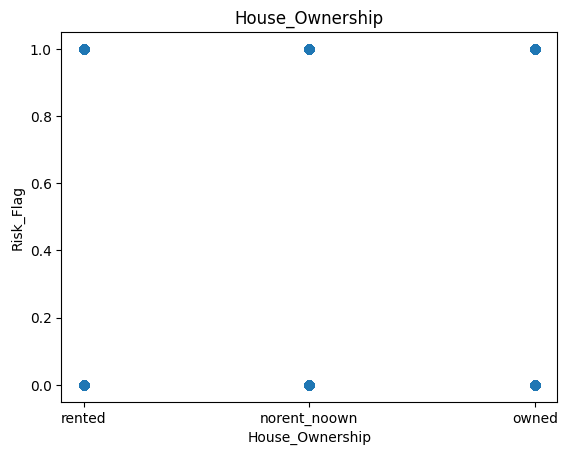

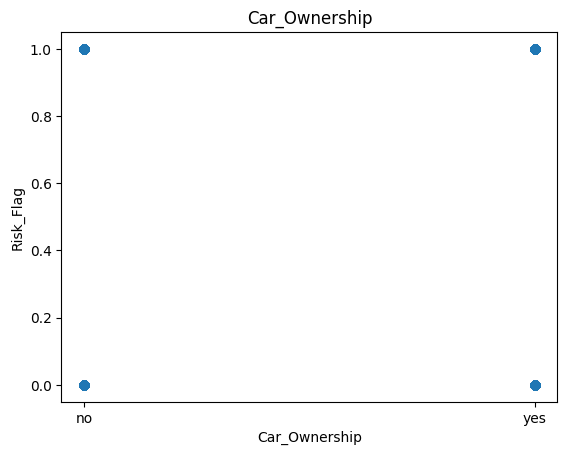

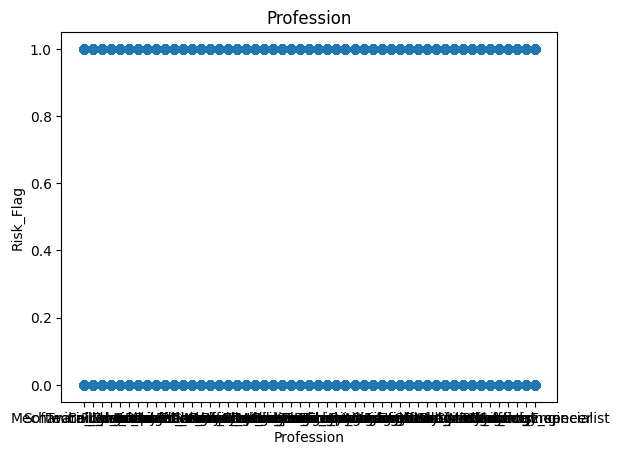

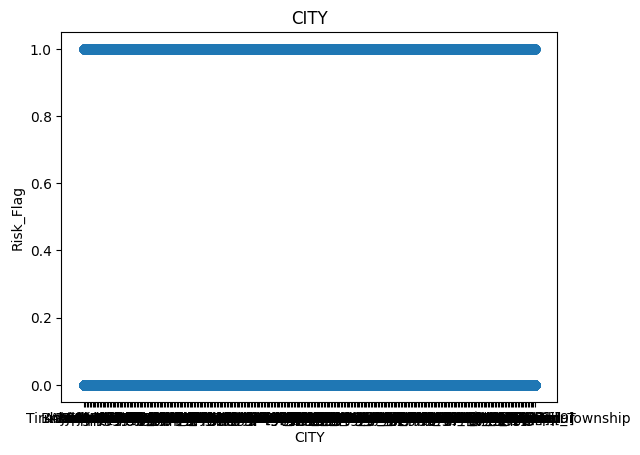

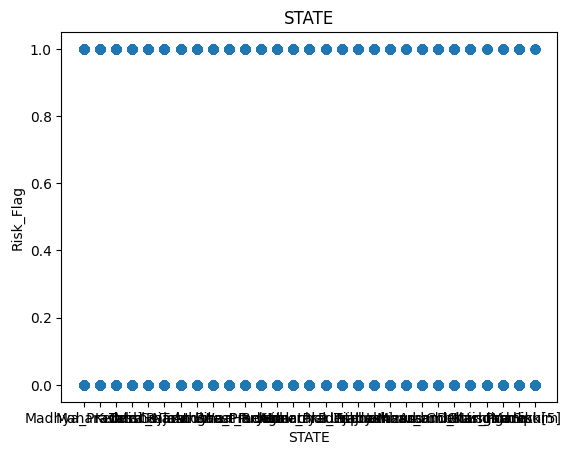

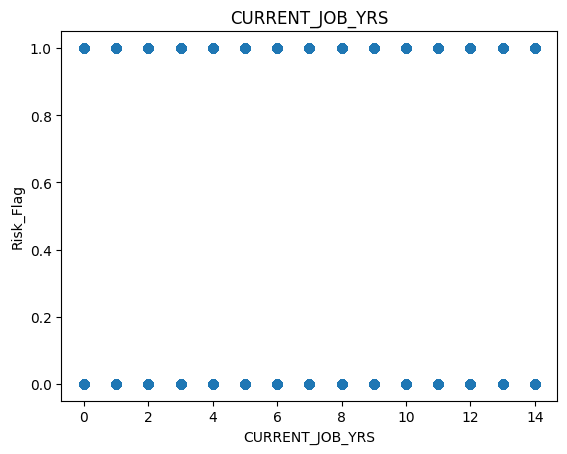

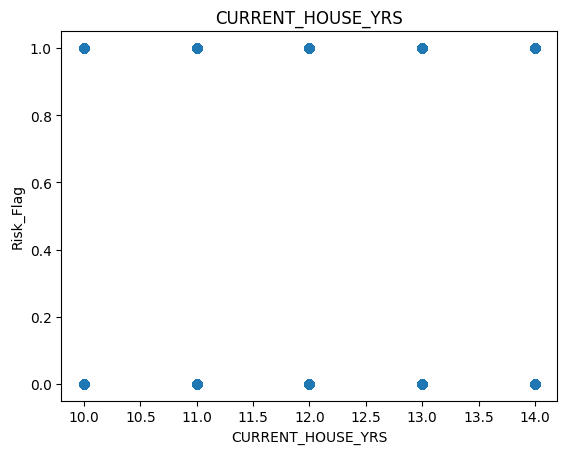

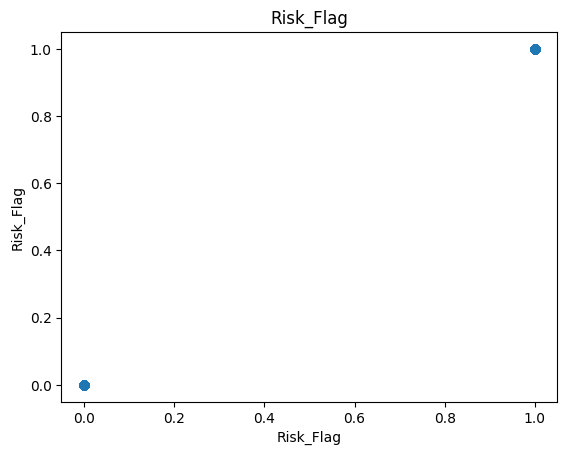

In [10]:
for label in df.columns:
    plt.scatter (df[label], df['Risk_Flag'])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Risk_Flag')
    plt.show()

In [11]:
null = df.isnull().sum()
null

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

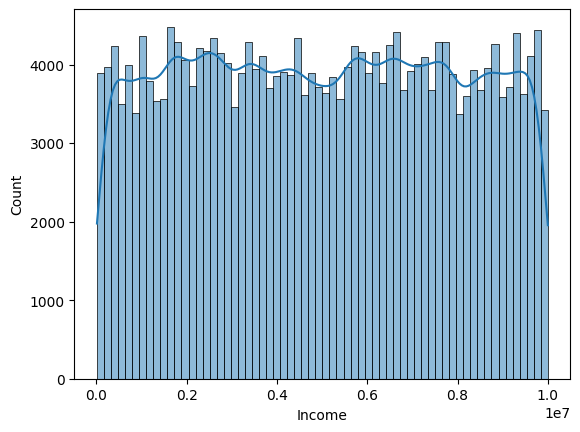

In [12]:
# Visualizations
sns.histplot(df['Income'], kde=True)
plt.show()

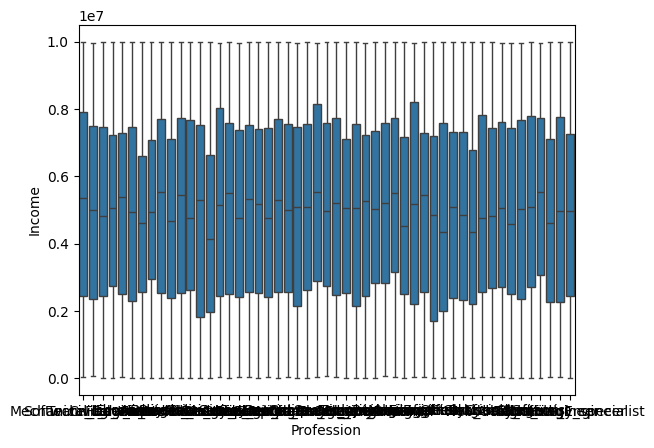

In [13]:
sns.boxplot(x='Profession', y='Income', data=df)
plt.show()

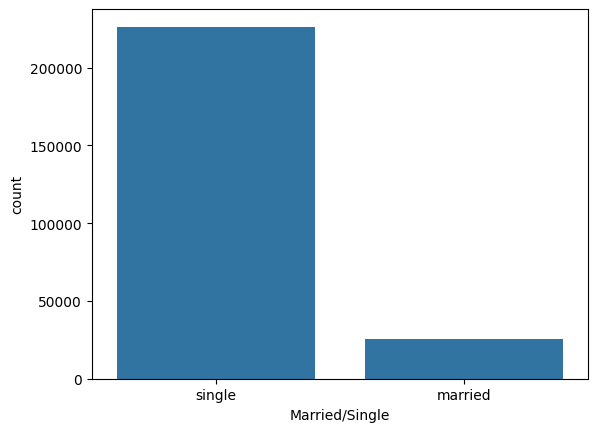

In [14]:
sns.countplot(x='Married/Single', data=df)
plt.show()

In [15]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Filter the DataFrame to include only numerical columns
numerical_df = df[numerical_cols]

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

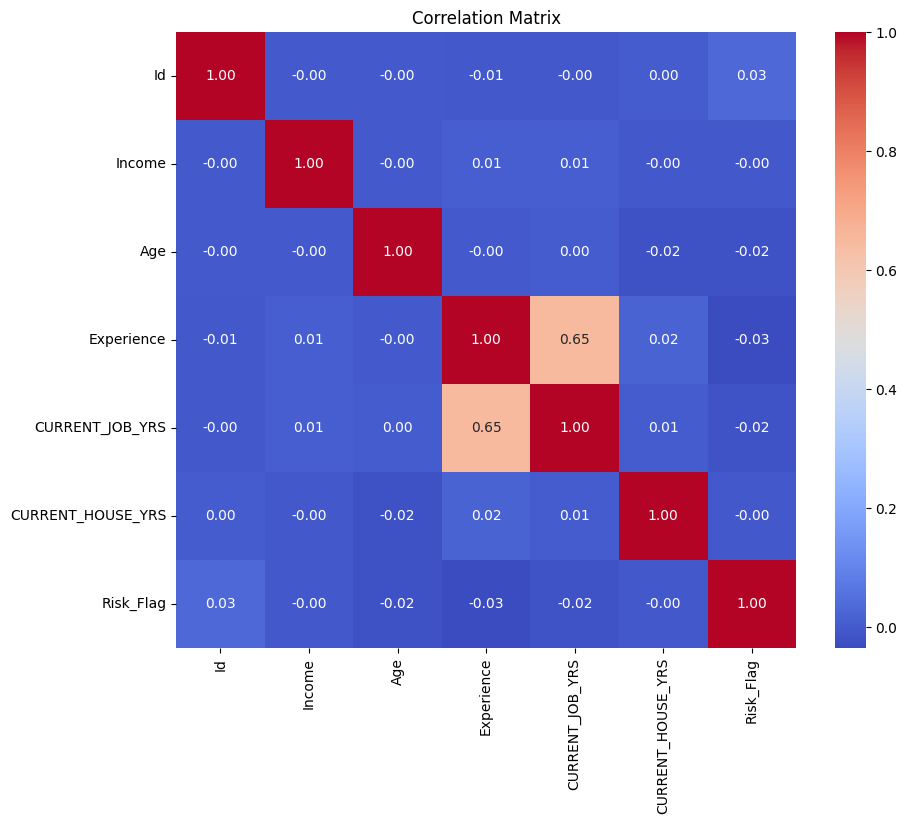

In [16]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

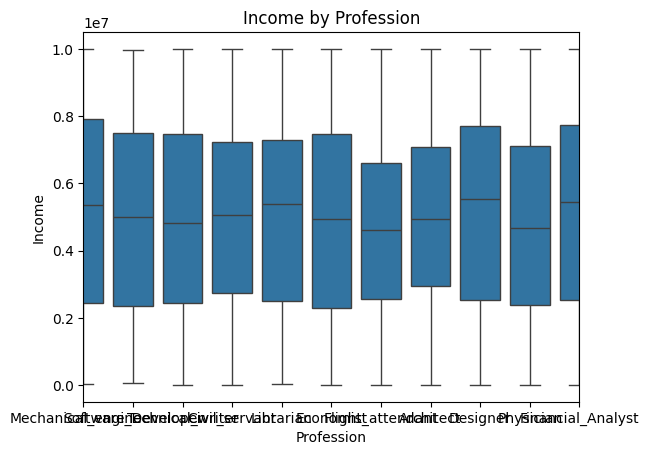

In [17]:
sns.boxplot(x='Profession', y='Income',data=df)
plt.title('Income by Profession')
# Zoom in on a specific range of values
plt.xlim(left=0, right=10)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [30]:
X = df[['Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]
y = df['Risk_Flag']

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [48]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


In [49]:
X = df.drop('Risk_Flag', axis=1)  # features
y = df['Risk_Flag']  # target variable

In [50]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8984920634920635

In [58]:
rsquared = r2_score(y_test, y_pred)
rsquared

0.06594715615626501

In [59]:
precision = precision_score(y_pred, y_test)
precision

0.5352630737246122

In [60]:
recall = recall_score(y_pred, y_test)
recall

0.6023034011157099

In [68]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     44843
           1       0.54      0.60      0.57      5557

    accuracy                           0.90     50400
   macro avg       0.74      0.77      0.75     50400
weighted avg       0.90      0.90      0.90     50400



In [70]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(feature_importances_df.head(10))

              Feature  Importance
0              Income    0.191260
7                CITY    0.163898
6          Profession    0.144342
1                 Age    0.144293
8               STATE    0.101679
2          Experience    0.082487
9     CURRENT_JOB_YRS    0.074021
10  CURRENT_HOUSE_YRS    0.064366
5       Car_Ownership    0.014493
4     House_Ownership    0.009585
